In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
words = open("names.txt","r").read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [3]:
len(words)

32033

In [4]:
chars = sorted(list(set("".join(words))))
stoi = {s:i+1 for i,s  in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [5]:
block_size = 3
X, Y = [], []
for w in words[:5]:

    print(w)
    context = [0] * block_size
    for ch in w + ".":
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        print("".join(itos[i] for i in context), '--->',itos[ix])
        context = context[1:] + [ix]
X = torch.tensor(X)
Y = torch.tensor(Y)

emma
... ---> e
..e ---> m
.em ---> m
emm ---> a
mma ---> .
olivia
... ---> o
..o ---> l
.ol ---> i
oli ---> v
liv ---> i
ivi ---> a
via ---> .
ava
... ---> a
..a ---> v
.av ---> a
ava ---> .
isabella
... ---> i
..i ---> s
.is ---> a
isa ---> b
sab ---> e
abe ---> l
bel ---> l
ell ---> a
lla ---> .
sophia
... ---> s
..s ---> o
.so ---> p
sop ---> h
oph ---> i
phi ---> a
hia ---> .


In [6]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

In [7]:
C = torch.randn((27,2)) # each character has a 2 demensional vector associated with it
C

tensor([[-0.6730, -2.1028],
        [-1.6035,  1.5879],
        [-2.1942, -0.2091],
        [ 0.3731,  0.7595],
        [ 1.0398, -1.2324],
        [-1.0112,  1.1717],
        [-0.0911,  0.5799],
        [ 0.7830, -0.5607],
        [ 0.1367,  0.8253],
        [-0.2522, -0.4180],
        [-0.3062,  2.2597],
        [ 2.1389, -0.6053],
        [ 0.0137, -0.8261],
        [ 0.6096, -0.8521],
        [-0.9035, -0.0708],
        [-1.8554,  0.4508],
        [-0.7662,  0.6710],
        [ 0.4381, -1.1271],
        [ 0.0888,  1.2787],
        [ 0.2288, -0.7244],
        [ 1.7223, -0.7271],
        [-0.5320, -0.4143],
        [-0.7940,  0.0857],
        [-0.6507,  2.2561],
        [ 0.2209, -1.4854],
        [-2.7979, -0.5124],
        [ 2.2532, -0.2082]])

In [8]:
C[5]

tensor([-1.0112,  1.1717])

In [9]:
F.one_hot(torch.tensor(5), num_classes=27)

tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0])

In [10]:
F.one_hot(torch.tensor(5), num_classes=27) @ C

RuntimeError: expected m1 and m2 to have the same dtype, but got: long long != float

In [ ]:
F.one_hot(torch.tensor(5), num_classes=27).float() @ C # same as C[5] since all other classes are zero except 5 which is 1
# this is also the first layer of the network, this is the embedding layer

tensor([1.9015, 1.0317])

In [ ]:
C[[5,6,7]],C[torch.tensor([5,6,7])]

(tensor([[ 1.9015,  1.0317],
         [ 0.3506, -0.1688],
         [ 0.7410, -2.2207]]),
 tensor([[ 1.9015,  1.0317],
         [ 0.3506, -0.1688],
         [ 0.7410, -2.2207]]))

In [ ]:
C[X].shape

torch.Size([32, 3, 2])

In [ ]:
C[X][13,2]

tensor([-1.6077, -1.0612])

In [ ]:
C[1]

tensor([-1.6077, -1.0612])

In [ ]:
emb = C[X] # this is our entire embedding of the dataset
emb.shape

torch.Size([32, 3, 2])

In [ ]:
# hidden layer
W1 = torch.randn((6,100))
b1 = torch.randn(100)


In [ ]:
# we want to do the following but need to transform the data first
emb @ W1 + b1

RuntimeError: mat1 and mat2 shapes cannot be multiplied (96x2 and 6x100)

In [ ]:
torch.cat([emb[:,0,:],emb[:,1,:],emb[:,2,:]],1).shape 
# [[...],[...],[...]] to [[.........]] squishing on a single dem

torch.Size([32, 6])

In [ ]:
torch.cat(torch.unbind(emb,1),1).shape # same as cell before

torch.Size([32, 6])

In [ ]:
a = torch.arange(18)
a.shape

torch.Size([18])

In [ ]:
a.view(2,9)

tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
        [ 9, 10, 11, 12, 13, 14, 15, 16, 17]])

In [ ]:
a.view(3,3,2)

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])

In [ ]:
# as long as the number of element we have multiply to the same number (same number of elements) we can rearange them in pytorch without a performance hit

In [ ]:
a.storage()
# always a 1 deminsional vector. view changes attributes of the view. storage offsets,strides, and shapes
# http://blog.ezyang.com/2019/05/pytorch-internals/

 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
 16
 17
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 18]

In [ ]:
emb.view(32,6).shape # same as unbind/concat 

torch.Size([32, 6])

In [ ]:
emb.view(32,6) == torch.cat(torch.unbind(emb,1),1)

tensor([[True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, T

In [ ]:
h = torch.tanh(emb.view(-1,6) @ W1 + b1) # tanh is the hyperbolic tangent and is a layer in the model

In [ ]:
h.shape,h

(torch.Size([32, 100]),
 tensor([[-0.0350,  0.9344,  0.4962,  ...,  0.3227,  0.9961, -0.9968],
         [ 0.3398,  0.9515, -0.8996,  ..., -0.4084,  1.0000, -0.9933],
         [ 0.7803,  0.9866,  0.9188,  ...,  0.8610,  1.0000, -0.9968],
         ...,
         [ 0.9827,  0.8388,  0.3665,  ...,  0.9870, -0.9999,  0.2154],
         [ 0.8740, -0.9956,  0.4583,  ...,  0.9984,  0.9998,  0.9988],
         [ 0.7991,  0.9019,  0.9619,  ...,  0.9995, -0.9655,  0.9958]]))

In [ ]:
# 32, 100
# (1), 100
# this is correct sense the same bias vector will be added to all of the rows. rows that represent each example

In [ ]:
W2 = torch.randn((100,27))
b2 = torch.randn(27)

In [ ]:
logits = h @ W2 + b2

In [ ]:
logits.shape

torch.Size([32, 27])

In [ ]:
counts = logits.exp()

In [ ]:
prob = counts / counts.sum(1, keepdim=True)

In [ ]:
prob[torch.arange(32),Y] # this gives the current probabilities as currently assigned by the model

tensor([1.3388e-12, 6.6873e-05, 4.0229e-07, 2.9036e-14, 1.3801e-11, 1.1539e-11,
        1.0099e-08, 4.2494e-05, 3.5720e-04, 3.6690e-07, 1.2854e-08, 2.0241e-08,
        1.8174e-14, 2.7504e-05, 6.2045e-04, 9.6068e-18, 2.2813e-08, 2.8963e-12,
        1.2628e-12, 9.4584e-07, 4.8519e-01, 9.1349e-07, 2.2580e-12, 3.1594e-11,
        1.1077e-11, 1.0857e-06, 3.3201e-09, 4.9162e-16, 1.1559e-09, 2.2492e-15,
        7.5328e-08, 3.1700e-09])

In [ ]:
-prob[torch.arange(32),Y].log().mean() # negative log likihood, which we want to minimize

tensor(20.1229)

In [ ]:
# --- rewritten ---

In [ ]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,2),generator=g)
W1 = torch.randn((6,100), generator=g)
b1 = torch.randn(100,generator=g)
W2 = torch.randn((100,27),generator=g)
b2 = torch.randn(27,generator=g)
parameters = [C, W1,b1,W2,b2]
for p in parameters:
    p.requires_grad = True
 

In [ ]:
sum(p.nelement() for p in parameters)

3481

In [ ]:
# forward pass
emb = C[X] # [32, 3, 2]
h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 
# counts = logits.exp()
# prob = counts / counts.sum(1, keepdim=True)
# loss = -prob[torch.arange(32),Y].log().mean()
loss = F.cross_entropy(logits,Y)
loss

tensor(17.7697)

In [ ]:
# now even more respectible 
F.cross_entropy(logits,Y) # this is one you'd actually use in practice. previous way was educational
# easier to backwards pass and far more efficent 
# things can be much more well behaived. Example was that pytorch uses techiques to avoid float overflows due to very large postive numbers


tensor(17.7697)

In [ ]:

for _ in range(1000):
    # forward pass
    emb = C[X] # [32, 3, 2]
    h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 
    loss = F.cross_entropy(logits,Y)
    print(loss.item())
    # backwoard pass
    # set gradients to 0
    for p in parameters:
        p.grad = None
    loss.backward() 
    # update 
    for p in parameters:
        p.data += -0.1 * p.grad

0.30458712577819824
0.3038754165172577
0.3031821548938751
0.3025068938732147
0.3018488883972168
0.30120763182640076
0.30058249831199646
0.2999732792377472
0.2993791103363037
0.29879963397979736
0.2982342839241028
0.2976827621459961
0.29714435338974
0.2966187000274658
0.29610541462898254
0.2956041097640991
0.2951143682003021
0.2946356236934662
0.29416775703430176
0.29371023178100586
0.2932628393173218
0.2928251028060913
0.2923968732357025
0.29197782278060913
0.2915674149990082
0.29116567969322205
0.29077228903770447
0.29038679599761963
0.29000914096832275
0.28963902592658997
0.2892761528491974
0.28892046213150024
0.2885715961456299
0.28822943568229675
0.28789377212524414
0.28756439685821533
0.2872411608695984
0.2869238555431366
0.28661227226257324
0.28630638122558594
0.2860059142112732
0.28571075201034546
0.2854207456111908
0.28513574600219727
0.2848556935787201
0.2845804691314697
0.2843097448348999
0.2840436100959778
0.28378191590309143
0.2835245728492737
0.28327125310897827
0.28302210

In [ ]:
logits

tensor([[ 3.6330e+00,  1.3344e+01,  5.3733e+00,  4.0964e+00, -6.7629e-01,
          1.3352e+01, -1.7996e+01,  5.7657e+00, -3.6054e+00,  1.3435e+01,
          6.8217e+00, -3.4204e+00, -1.7846e-01,  7.3026e+00,  1.5929e-01,
          1.3369e+01,  3.7618e+00,  6.6885e+00, -7.2071e-01,  1.3247e+01,
         -2.6216e+00,  4.6573e+00,  7.1206e+00, -6.5330e+00,  6.3406e+00,
         -5.4540e+00,  5.9469e+00],
        [-9.2143e+00,  7.5805e+00,  1.8970e+00,  1.3441e+00,  5.6386e+00,
          9.9656e+00, -2.4572e+00,  4.2969e+00,  8.5794e+00, -3.6865e+00,
          1.0400e+01, -1.0063e+00,  1.2370e+01,  1.7991e+01,  5.8731e+00,
          6.3112e+00,  8.8408e+00,  1.8544e+00,  7.5166e+00,  9.4346e+00,
          2.0294e+00, -9.0835e+00, -9.8888e+00, -1.1869e+01,  1.6936e+00,
         -4.0845e+00,  6.2728e+00],
        [ 8.1205e+00,  1.2055e+01,  1.0338e+01,  5.6828e+00, -1.9490e+00,
          5.6269e+00, -9.9272e+00, -8.7161e+00, -1.1291e+01,  1.4173e+01,
          5.7005e+00,  1.1688e+01,  5.37

In [ ]:
block_size = 3
X, Y = [], []
for w in words:
    context = [0] * block_size
    for ch in w + ".":
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        context = context[1:] + [ix]
X = torch.tensor(X)
Y = torch.tensor(Y)
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,2),generator=g)
W1 = torch.randn((6,100), generator=g)
b1 = torch.randn(100,generator=g)
W2 = torch.randn((100,27),generator=g)
b2 = torch.randn(27,generator=g)
parameters = [C, W1,b1,W2,b2]
for p in parameters:
    p.requires_grad = True

In [ ]:
# lre = torch.linspace(-3,0,1000)
# lrs = 10 **lre
# lrs

In [ ]:
# lri = []
# lossi = []
for i in range(100000):
    # mini batch construct 
    ix = torch.randint(0,X.shape[0], (32,)) # select indexes to using in the mini batch via rand number

    # forward pass
    emb = C[X[ix]] # [32, 3, 2] not [200k,3,2] because of mini batch
    h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 
    loss = F.cross_entropy(logits,Y[ix])
    # print(loss.item())
    # backwoard pass
    # set gradients to 0
    for p in parameters:
        p.grad = None
    loss.backward() 
    # update 
    # lr = lrs[i]
    # lr = 10**-1
    lr = 10**-2 # learning rate decay
    for p in parameters:
        p.data += -lr * p.grad
    # lri.append(lre[i])
    # lossi.append(loss.item())
# better to have an aproximate gradient and take many steps than have an exact gradient and take view steps

In [ ]:
emb = C[X] # [32, 3, 2] not [200k,3,2] because of mini batch
h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 
loss = F.cross_entropy(logits,Y)
print(loss.item())

2.2123119831085205


In [ ]:
# plt.plot(lri,lossi)
# shows a local min of around -1

In [ ]:
# lower loss does not exactly mean a good model. As the size of the NN grows the more vulnerable it is to learning the training set.
# we need to have a validation set (unseen) to make sure it's generalizing
# 3 splits 

In [127]:
# training, test, validation
# 80% ,10%, 10%
def build_dataset(words):
    block_size = 3
    X, Y = [], []
    for w in words:
        context = [0] * block_size
        for ch in w + ".":
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix]
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape,Y.shape)
    return(X,Y)
import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182441, 4]) torch.Size([182441])
torch.Size([22902, 4]) torch.Size([22902])
torch.Size([22803, 4]) torch.Size([22803])


In [128]:
C = torch.randn((27,2))
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,2),generator=g)
W1 = torch.randn((6,100), generator=g)
b1 = torch.randn(100,generator=g)
W2 = torch.randn((100,27),generator=g)
b2 = torch.randn(27,generator=g)
parameters = [C, W1,b1,W2,b2]
for p in parameters:
    p.requires_grad = True

In [129]:
for i in range(100000):
    # mini batch construct 
    ix = torch.randint(0,Xtr.shape[0], (32,)) # select indexes to using in the mini batch via rand number

    # forward pass
    emb = C[Xtr[ix]] # [32, 3, 2] not [200k,3,2] because of mini batch
    h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 
    loss = F.cross_entropy(logits,Ytr[ix])
    # print(loss.item())
    # backwoard pass
    # set gradients to 0
    for p in parameters:
        p.grad = None
    loss.backward() 
    # update 
    lr = 10**-1 # learning rate decay
    for p in parameters:
        p.data += -lr * p.grad
    # lri.append(lre[i])
    # lossi.append(loss.item())
# better to have an aproximate gradient and take many steps than have an exact gradient and take view steps

torch.Size([32, 4, 2])
torch.Size([32, 8])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (32x8 and 6x100)

In [ ]:
emb = C[Xtr] # [32, 3, 2] not [200k,3,2] because of mini batch
h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 
loss = F.cross_entropy(logits,Ytr)
print(loss.item())
# https://youtu.be/TCH_1BHY58I?si=7BsQIgXMf7zG2uLu&t=3536

2.8296210765838623


In [154]:
# training, test, validation
# 80% ,10%, 10%
def build_dataset(words):
    block_size = 3
    X, Y = [], []
    for w in words:
        context = [0] * block_size
        for ch in w + ".":
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix]
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape,Y.shape)
    return(X,Y)
import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])
# increase the hidden layer size
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,10),generator=g)
W1 = torch.randn((30,300), generator=g) # 3 x 10 trigram
b1 = torch.randn(300,generator=g)
W2 = torch.randn((300,27),generator=g)
b2 = torch.randn(27,generator=g)
parameters = [C, W1,b1,W2,b2]
for p in parameters:
    p.requires_grad = True

sum(p.nelement() for p in parameters)

torch.Size([182534, 3]) torch.Size([182534])
torch.Size([22873, 3]) torch.Size([22873])
torch.Size([22739, 3]) torch.Size([22739])


17697

In [155]:
lri = []
lossi = []
stepi = []

In [156]:

for i in range(50000):
    # mini batch construct 
    ix = torch.randint(0,Xtr.shape[0], (64,)) # select indexes to using in the mini batch via rand number

    # forward pass
    emb = C[Xtr[ix]] # [32, 3, 2] not [200k,3,2] because of mini batch
    h = torch.tanh(emb.view(-1,30) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 
    loss = F.cross_entropy(logits,Ytr[ix])
    # print(loss.item())
    # backwoard pass
    # set gradients to 0
    for p in parameters:
        p.grad = None
    loss.backward() 
    # update 
    lr = 0.001 # learning rate decay
    for p in parameters:
        p.data += -lr * p.grad
    stepi.append(i)
    lossi.append(loss.log10().item())
# better to have an aproximate gradient and take many steps than have an exact gradient and take view steps

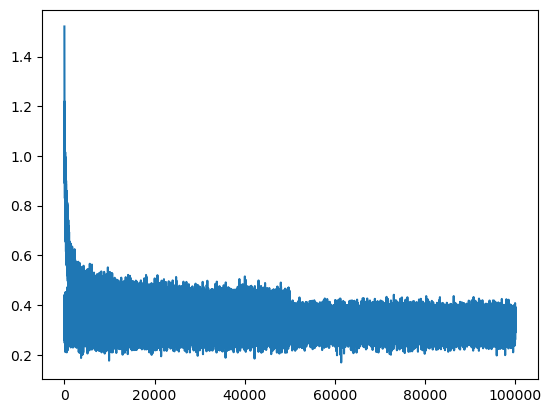

In [107]:
plt.plot(stepi,lossi)

In [108]:
emb = C[Xtr] # [32, 3, 2] not [200k,3,2] because of mini batch
h = torch.tanh(emb.view(-1,30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 
loss = F.cross_entropy(logits,Ytr)
print(loss.item())

2.108023166656494


In [109]:
emb = C[Xdev] # [32, 3, 2] not [200k,3,2] because of mini batch
h = torch.tanh(emb.view(-1,30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 
loss = F.cross_entropy(logits,Ydev)
print(loss.item())

2.159442186355591


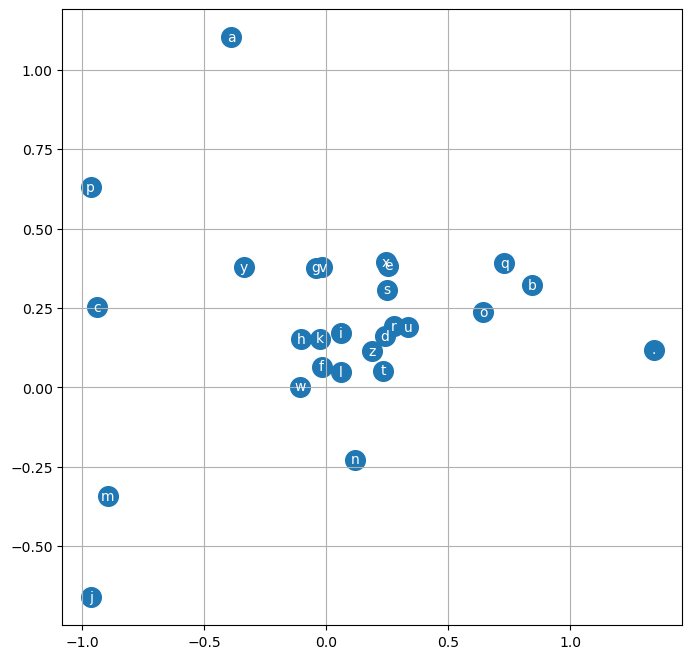

In [101]:
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data,C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(),itos[i],ha="center", va="center",color="white")
plt.grid("minor")

In [158]:
# sample from the model
g = torch.Generator().manual_seed(214748347 + 10)

for _ in range(20):
    out = []
    context = [0] * block_size
    while True:
        emb = C[torch.tensor([context])]
        h = torch.tanh(emb.view(1,-1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits,dim=1)
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break
    print("".join(itos[i] for i in out))

exionn.
lun.
briani.
sis.
tzzilynlesian.
colamarta.
ttvalen.
ritmajon.
kill.
keoui.
corie.
ysbaa.
moloanroty.
mattaylieson.
arkin.
doula.
kaireilahia.
gian.
har.
teom.
